In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


file_name = "/content/Unemployment in India.csv"
df = pd.read_csv(file_name)


df_cleaned = df.dropna()


df_cleaned.columns = df_cleaned.columns.str.strip()

df_cleaned.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate'
}, inplace=True)


df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)


print("Data Cleaning Complete. DataFrame 'df_cleaned' is ready.")

Data Cleaning Complete. DataFrame 'df_cleaned' is ready.


/tmp/ipython-input-2597346597.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={
/tmp/ipython-input-2597346597.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)


/tmp/ipython-input-2708263238.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




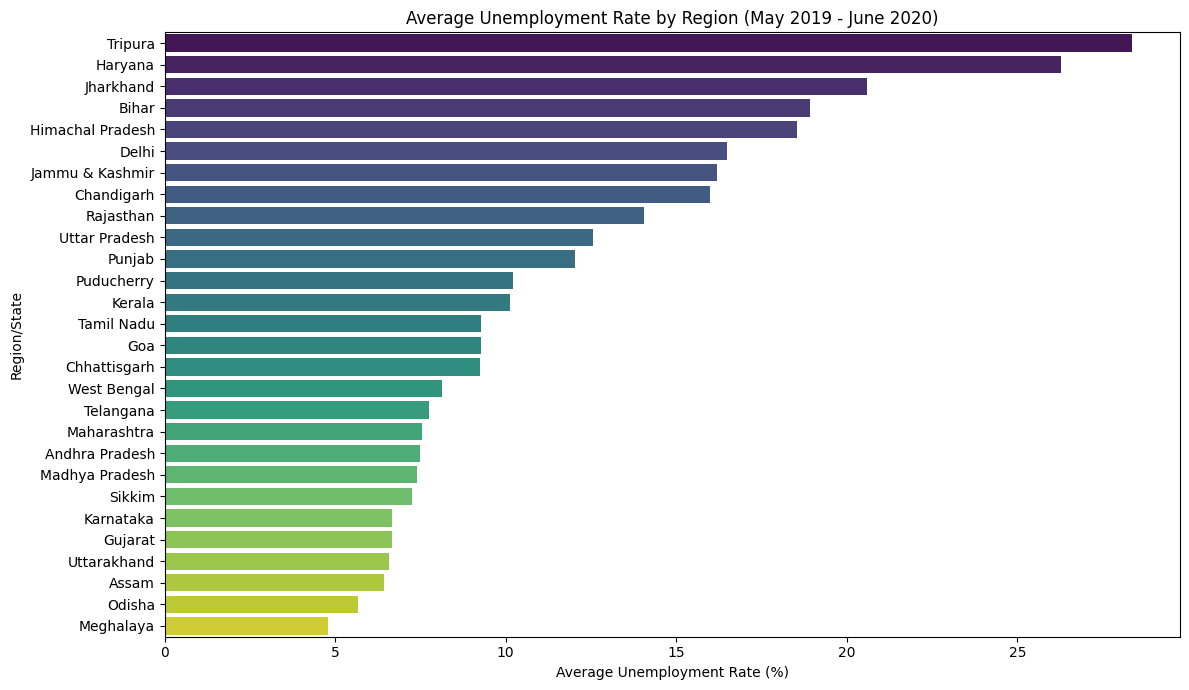

In [3]:

unemployment_trend = df_cleaned.groupby('Date')[['Unemployment Rate']].mean().reset_index()


fig_national = px.line(
    unemployment_trend,
    x='Date',
    y='Unemployment Rate',
    title='National Average Unemployment Rate Trend Over Time (May 2019 - June 2020)',
    labels={'Unemployment Rate': 'Avg. Unemployment Rate (%)', 'Date': 'Month-End Date'}
)

# To Highlight the COVID-19 lockdown impact period
start_date = '2020-03-01'
end_date = '2020-06-01'
fig_national.add_vrect(
    x0=start_date,
    x1=end_date,
    fillcolor="red",
    opacity=0.2,
    line_width=0,
    annotation_text="Nationwide Lockdown Impact",
    annotation_position="top left"
)
fig_national.show()
region_unemployment = df_cleaned.groupby('Region')['Unemployment Rate'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Unemployment Rate', y='Region', data=region_unemployment, palette='viridis')
plt.title('Average Unemployment Rate by Region (May 2019 - June 2020)')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region/State')
plt.tight_layout()
plt.show()

/tmp/ipython-input-694092491.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-694092491.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-694092491.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




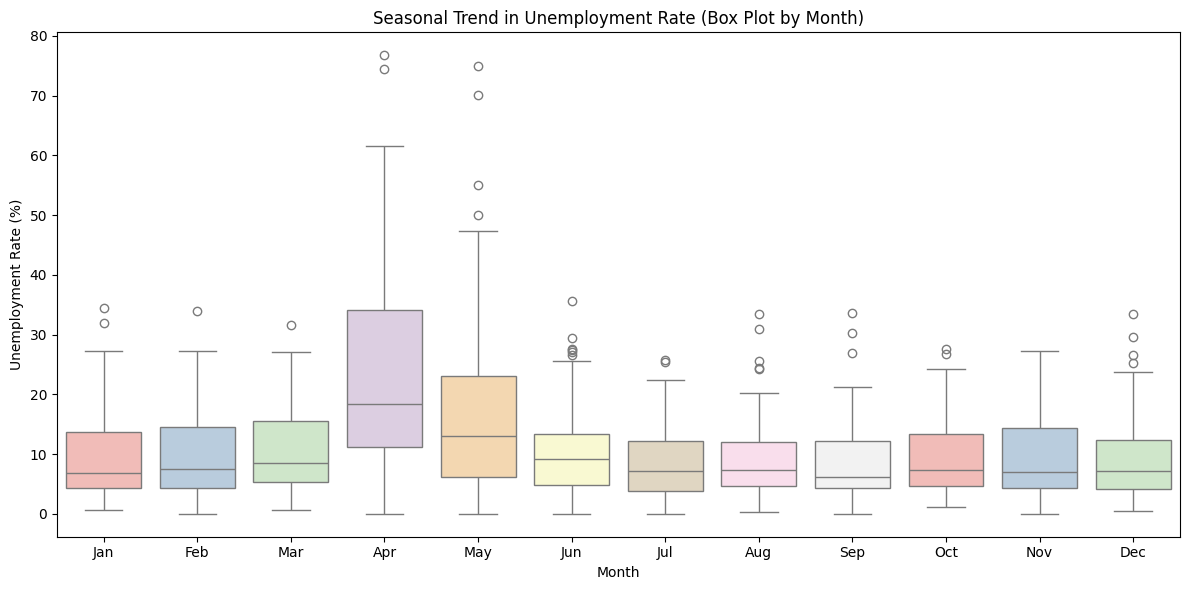

In [4]:


# To Identify Seasonal Trends


df_cleaned['Month'] = df_cleaned['Date'].dt.month


month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_cleaned['Month_Name'] = df_cleaned['Month'].map(month_names)


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Month_Name',
    y='Unemployment Rate',
    data=df_cleaned,
    order=month_order,
    palette='Pastel1'
)
plt.title('Seasonal Trend in Unemployment Rate (Box Plot by Month)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

In [6]:
# To Quantify the COVID Shock

pre_covid_end_date = '2020-03-01'
peak_covid_start_date = '2020-03-01'
peak_covid_end_date = '2020-06-01'


pre_covid_df = df_cleaned[df_cleaned['Date'] < pre_covid_end_date]
avg_rate_pre_covid = pre_covid_df['Unemployment Rate'].mean()


peak_covid_df = df_cleaned[(df_cleaned['Date'] >= peak_covid_start_date) & (df_cleaned['Date'] < peak_covid_end_date)]
max_rate_peak_covid = peak_covid_df['Unemployment Rate'].max() # Use max rate for the spike

# To Calculate the percentage increase
percent_increase = ((max_rate_peak_covid - avg_rate_pre_covid) / avg_rate_pre_covid) * 100

print("\n--- Quantification of COVID Shock ---")
print(f"Average Pre-COVID Rate (before Mar 2020): {avg_rate_pre_covid:.2f}%")
print(f"Peak Unemployment Rate (Mar-May 2020): {max_rate_peak_covid:.2f}%")
print(f"Percentage Increase from Avg. Pre-COVID to Peak: {percent_increase:.2f}%")



rural_urban_trend = df_cleaned.groupby(['Date', 'Area'])['Unemployment Rate'].mean().reset_index()

fig_urban_rural = px.line(
    rural_urban_trend,
    x='Date',
    y='Unemployment Rate',
    color='Area',
    title='Unemployment Rate Comparison: Rural vs. Urban During COVID',
    labels={'Unemployment Rate': 'Avg. Unemployment Rate (%)'}
)
fig_urban_rural.show()



top_3_regions = region_unemployment.head(3)['Region'].tolist()
bottom_3_regions = region_unemployment.tail(3)['Region'].tolist()
selected_regions = top_3_regions + bottom_3_regions


df_focused = df_cleaned[df_cleaned['Region'].isin(selected_regions)]

fig_focused = px.line(
    df_focused,
    x='Date',
    y='Unemployment Rate',
    color='Region',
    title='Time Series for Highest and Lowest Unemployment Regions',
    labels={'Unemployment Rate': 'Unemployment Rate (%)'}
)
fig_focused.show()


--- Quantification of COVID Shock ---
Average Pre-COVID Rate (before Mar 2020): 9.51%
Peak Unemployment Rate (Mar-May 2020): 76.74%
Percentage Increase from Avg. Pre-COVID to Peak: 706.98%
